In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.csv", index_col = 'Loan_ID')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [ ]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
df['Married'] = df['Married'].replace(['Yes','No'],[1,0])
df['Dependents'] = df['Dependents'].replace(['0','1','2'],[0,1,2])
df['Dependents'] = df['Dependents'].replace('3+' , 3)
df['Education'] = df['Education'].replace(['Graduate' , 'Not Graduate'],[1,0])
df['Self_Employed'] = df['Self_Employed'].replace(['Yes','No'],[1,0])
df['Property_Area'] = df['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])
df['Loan_Status'] = df['Loan_Status'].replace(['Y','N'],[1,0])

In [ ]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(480, 12)

In [ ]:
from sklearn.model_selection import train_test_split
X_LS = df.drop(columns = ["Loan_Status"])
y_LS = df["Loan_Status"]
# split into train test sets
X_train_LS, X_test_LS, y_train_LS, y_test_LS = train_test_split(X_LS, y_LS, test_size=0.25, random_state = 12)
X_train_LS

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001275,1.0,1.0,1.0,1,0.0,3988,0.0,50.0,240.0,1.0,0
LP001813,1.0,0.0,0.0,1,1.0,6050,4333.0,120.0,180.0,1.0,0
LP002255,1.0,0.0,3.0,1,0.0,9167,0.0,185.0,360.0,1.0,1
LP001194,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,2
LP002236,1.0,1.0,2.0,1,0.0,4566,0.0,100.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
LP001978,1.0,0.0,0.0,1,0.0,4000,2500.0,140.0,360.0,1.0,1
LP002065,1.0,1.0,3.0,1,0.0,15000,0.0,300.0,360.0,1.0,1
LP002603,0.0,0.0,0.0,1,0.0,645,3683.0,113.0,480.0,1.0,1


In [ ]:
from sklearn.linear_model import LogisticRegression

model_logis_sel = LogisticRegression()
model_logis_sel.fit(X_train_LS, y_train_LS)
model_logis_sel.score(X_train_LS, y_train_LS)

0.8277777777777777

In [ ]:
y_pred_LS = model_logis_sel.predict(X_test_LS)

y_pred_prob = model_logis_sel.predict_proba(X_test_LS)


LS_prob = model_logis_sel.predict_proba(X_test_LS)[:,1]
print(y_pred_prob.shape,LS_prob.shape)

(120, 2) (120,)


In [ ]:
print(y_pred_prob, y_pred_LS)

[[0.1856904  0.8143096 ]
 [0.71851358 0.28148642]
 [0.12427837 0.87572163]
 [0.25924624 0.74075376]
 [0.19642949 0.80357051]
 [0.01945484 0.98054516]
 [0.18617918 0.81382082]
 [0.15280237 0.84719763]
 [0.21424101 0.78575899]
 [0.18537389 0.81462611]
 [0.23566789 0.76433211]
 [0.8847007  0.1152993 ]
 [0.82694337 0.17305663]
 [0.1081365  0.8918635 ]
 [0.15045371 0.84954629]
 [0.16479807 0.83520193]
 [0.28143703 0.71856297]
 [0.15951982 0.84048018]
 [0.19225393 0.80774607]
 [0.2041565  0.7958435 ]
 [0.23121987 0.76878013]
 [0.17504694 0.82495306]
 [0.14581389 0.85418611]
 [0.11410292 0.88589708]
 [0.13410066 0.86589934]
 [0.15074209 0.84925791]
 [0.12288634 0.87711366]
 [0.83901636 0.16098364]
 [0.76081734 0.23918266]
 [0.10152411 0.89847589]
 [0.23453166 0.76546834]
 [0.23251003 0.76748997]
 [0.11732664 0.88267336]
 [0.08754877 0.91245123]
 [0.29502537 0.70497463]
 [0.8786898  0.1213102 ]
 [0.43709867 0.56290133]
 [0.32276007 0.67723993]
 [0.78856522 0.21143478]
 [0.27349212 0.72650788]


In [ ]:
DD = pd.DataFrame(LS_prob)
DD.rename({0:'LS_prob'}, axis=1,inplace=True)
#DD["Adjusted_Prob"] = DD["LS_prob"]
DD["Loan_ID"] = y_test_LS.index
DD["Actual Approvals"] = y_test_LS.values

DD = DD.sort_values(by = "LS_prob", ascending = False)
DD = DD.reset_index(drop = True)
DD["Decile"] = pd.qcut(DD.index,10,labels = [1,2,3,4,5,6,7,8,9,10])


AD_decile = DD.groupby("Decile", as_index = False).agg({"LS_prob":['count','min','max'],"Actual Approvals":['sum']})
AD_decile = AD_decile.droplevel(level = 0, axis =1).reset_index(drop = True)
AD_decile = AD_decile.rename(columns = {"":"Decile","sum":"Approvals","count":"Count of Customers"})
AD_decile["Approval Rate"] = (AD_decile["Approvals"]/AD_decile["Count of Customers"])*100
AD_decile["% of Approval"] = round((AD_decile["Approvals"]/sum(AD_decile["Approvals"]))*100,2)
AD_decile['Cumulative % of Approvals'] = round(np.cumsum(AD_decile["% of Approval"]),1)
AD_decile['Cumulative Customers'] = np.cumsum(AD_decile["Count of Customers"])
AD_decile['Cumulative % of Customers'] = (AD_decile['Cumulative Customers']/ sum(AD_decile["Count of Customers"]))*100
AD_decile['Lift'] = round(AD_decile['Cumulative % of Approvals']/AD_decile['Cumulative % of Customers'],2)
AD_decile['Probabilty Range'] = round(AD_decile['min'],4).astype(str)+'-'+ round(AD_decile['max'],4).astype(str)
AD_decile['Cum% of Customers'] = (AD_decile['Cumulative % of Customers'].astype(int)).astype(str)+'%'
AD_decile["Approval Rate"] = AD_decile["Approval Rate"].astype(str)+"%"
AD_decile["% of Approvals"] = AD_decile["% of Approval"].astype(str)+"%"
AD_decile['Cum% of Approvals'] = AD_decile['Cumulative % of Approvals'].astype(str)+"%"
AD_decile_new = AD_decile[["Decile","Count of Customers","Cum% of Customers","Approvals","Approval Rate","% of Approvals", "Cum% of Approvals","Lift","Probabilty Range"]]

In [ ]:
AD_decile_new

,Decile,Count of Customers,Cum% of Customers,Approvals,Approval Rate,% of Approvals,Cum% of Approvals,Lift,Probabilty Range
0,1,12,10%,9,75.0%,11.54%,11.5%,1.15,0.9013-0.9805
1,2,12,20%,10,83.33333333333334%,12.82%,24.4%,1.22,0.8757-0.8985
2,3,12,30%,8,66.66666666666666%,10.26%,34.6%,1.15,0.8493-0.8744
3,4,12,40%,10,83.33333333333334%,12.82%,47.4%,1.18,0.825-0.8472
4,5,12,50%,9,75.0%,11.54%,59.0%,1.18,0.7979-0.8215
5,6,12,60%,9,75.0%,11.54%,70.5%,1.18,0.7688-0.7965
6,7,12,70%,9,75.0%,11.54%,82.1%,1.17,0.7281-0.7675
7,8,12,80%,10,83.33333333333334%,12.82%,94.9%,1.19,0.6483-0.7265
8,9,12,90%,2,16.666666666666664%,2.56%,97.4%,1.08,0.2092-0.6242
9,10,12,100%,2,16.666666666666664%,2.56%,100.0%,1.00,0.069-0.1788


In [ ]:
pd.DataFrame(AD_decile_new).to_csv('AD_Decile_new.csv',sep=',')

In [ ]:
#Getting the top 10% decile

prospective_LB = DD[DD["Decile"] == 1]["Loan_ID"]
pd.DataFrame(prospective_LB).transpose().to_csv("prospective.csv", sep = ",")

In [ ]:
DD[DD["Decile"] == 1]["Loan_ID"]

0     LP002586
1     LP002928
2     LP002868
3     LP001870
4     LP001030
5     LP001334
6     LP001401
7     LP002931
8     LP002792
9     LP001800
10    LP002619
11    LP001639
Name: Loan_ID, dtype: object

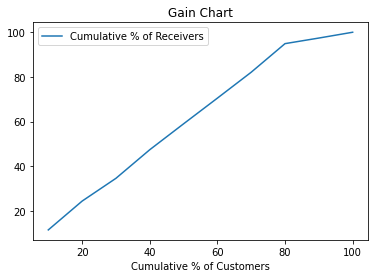

In [ ]:
AD_decile.plot(kind = 'line', x = 'Cumulative % of Customers', y = 'Cumulative % of Receivers')
plt.title('Gain Chart')
plt.show()